
# Análisis Exploratorio de Datos (EDA) - Spotify Dataset

## Descripción del Problema
El objetivo de este proyecto es **clasificar canciones como "populares" o "no populares"** utilizando técnicas de Machine Learning, basándonos en características extraídas de audio.

El dataset contiene canciones desde los años 60 hasta los 2010s, con variables como `danceability`, `energy`, `valence`, entre otras.

La variable objetivo es `target`:
- **1**: Canción popular
- **0**: No popular


In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spotify_df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('./spotify', "*.csv"))))

spotify_df.head()∂

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


Mostramos todas las features del dataset a analizar

In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41106 entries, 0 to 7765
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64
 17 

Estas variables en principio no las vamos a usar, entonces las eliminamos

In [7]:
spotify_df.drop(columns=['track', 'artist', 'uri'], inplace=True)

Nos aseguramos que los datos estén distribuidos de manera pareja en cada clase, porque eso puede afectar a la clasificación final

In [9]:
print("Categorías: ", spotify_df['target'].unique())
print("Cantidad de registros de cada categoría: ", spotify_df['target'].value_counts())

Categorías:  [0 1]
Cantidad de registros de cada categoría:  target
0    20553
1    20553
Name: count, dtype: int64


## Distribución de Variables Numéricas

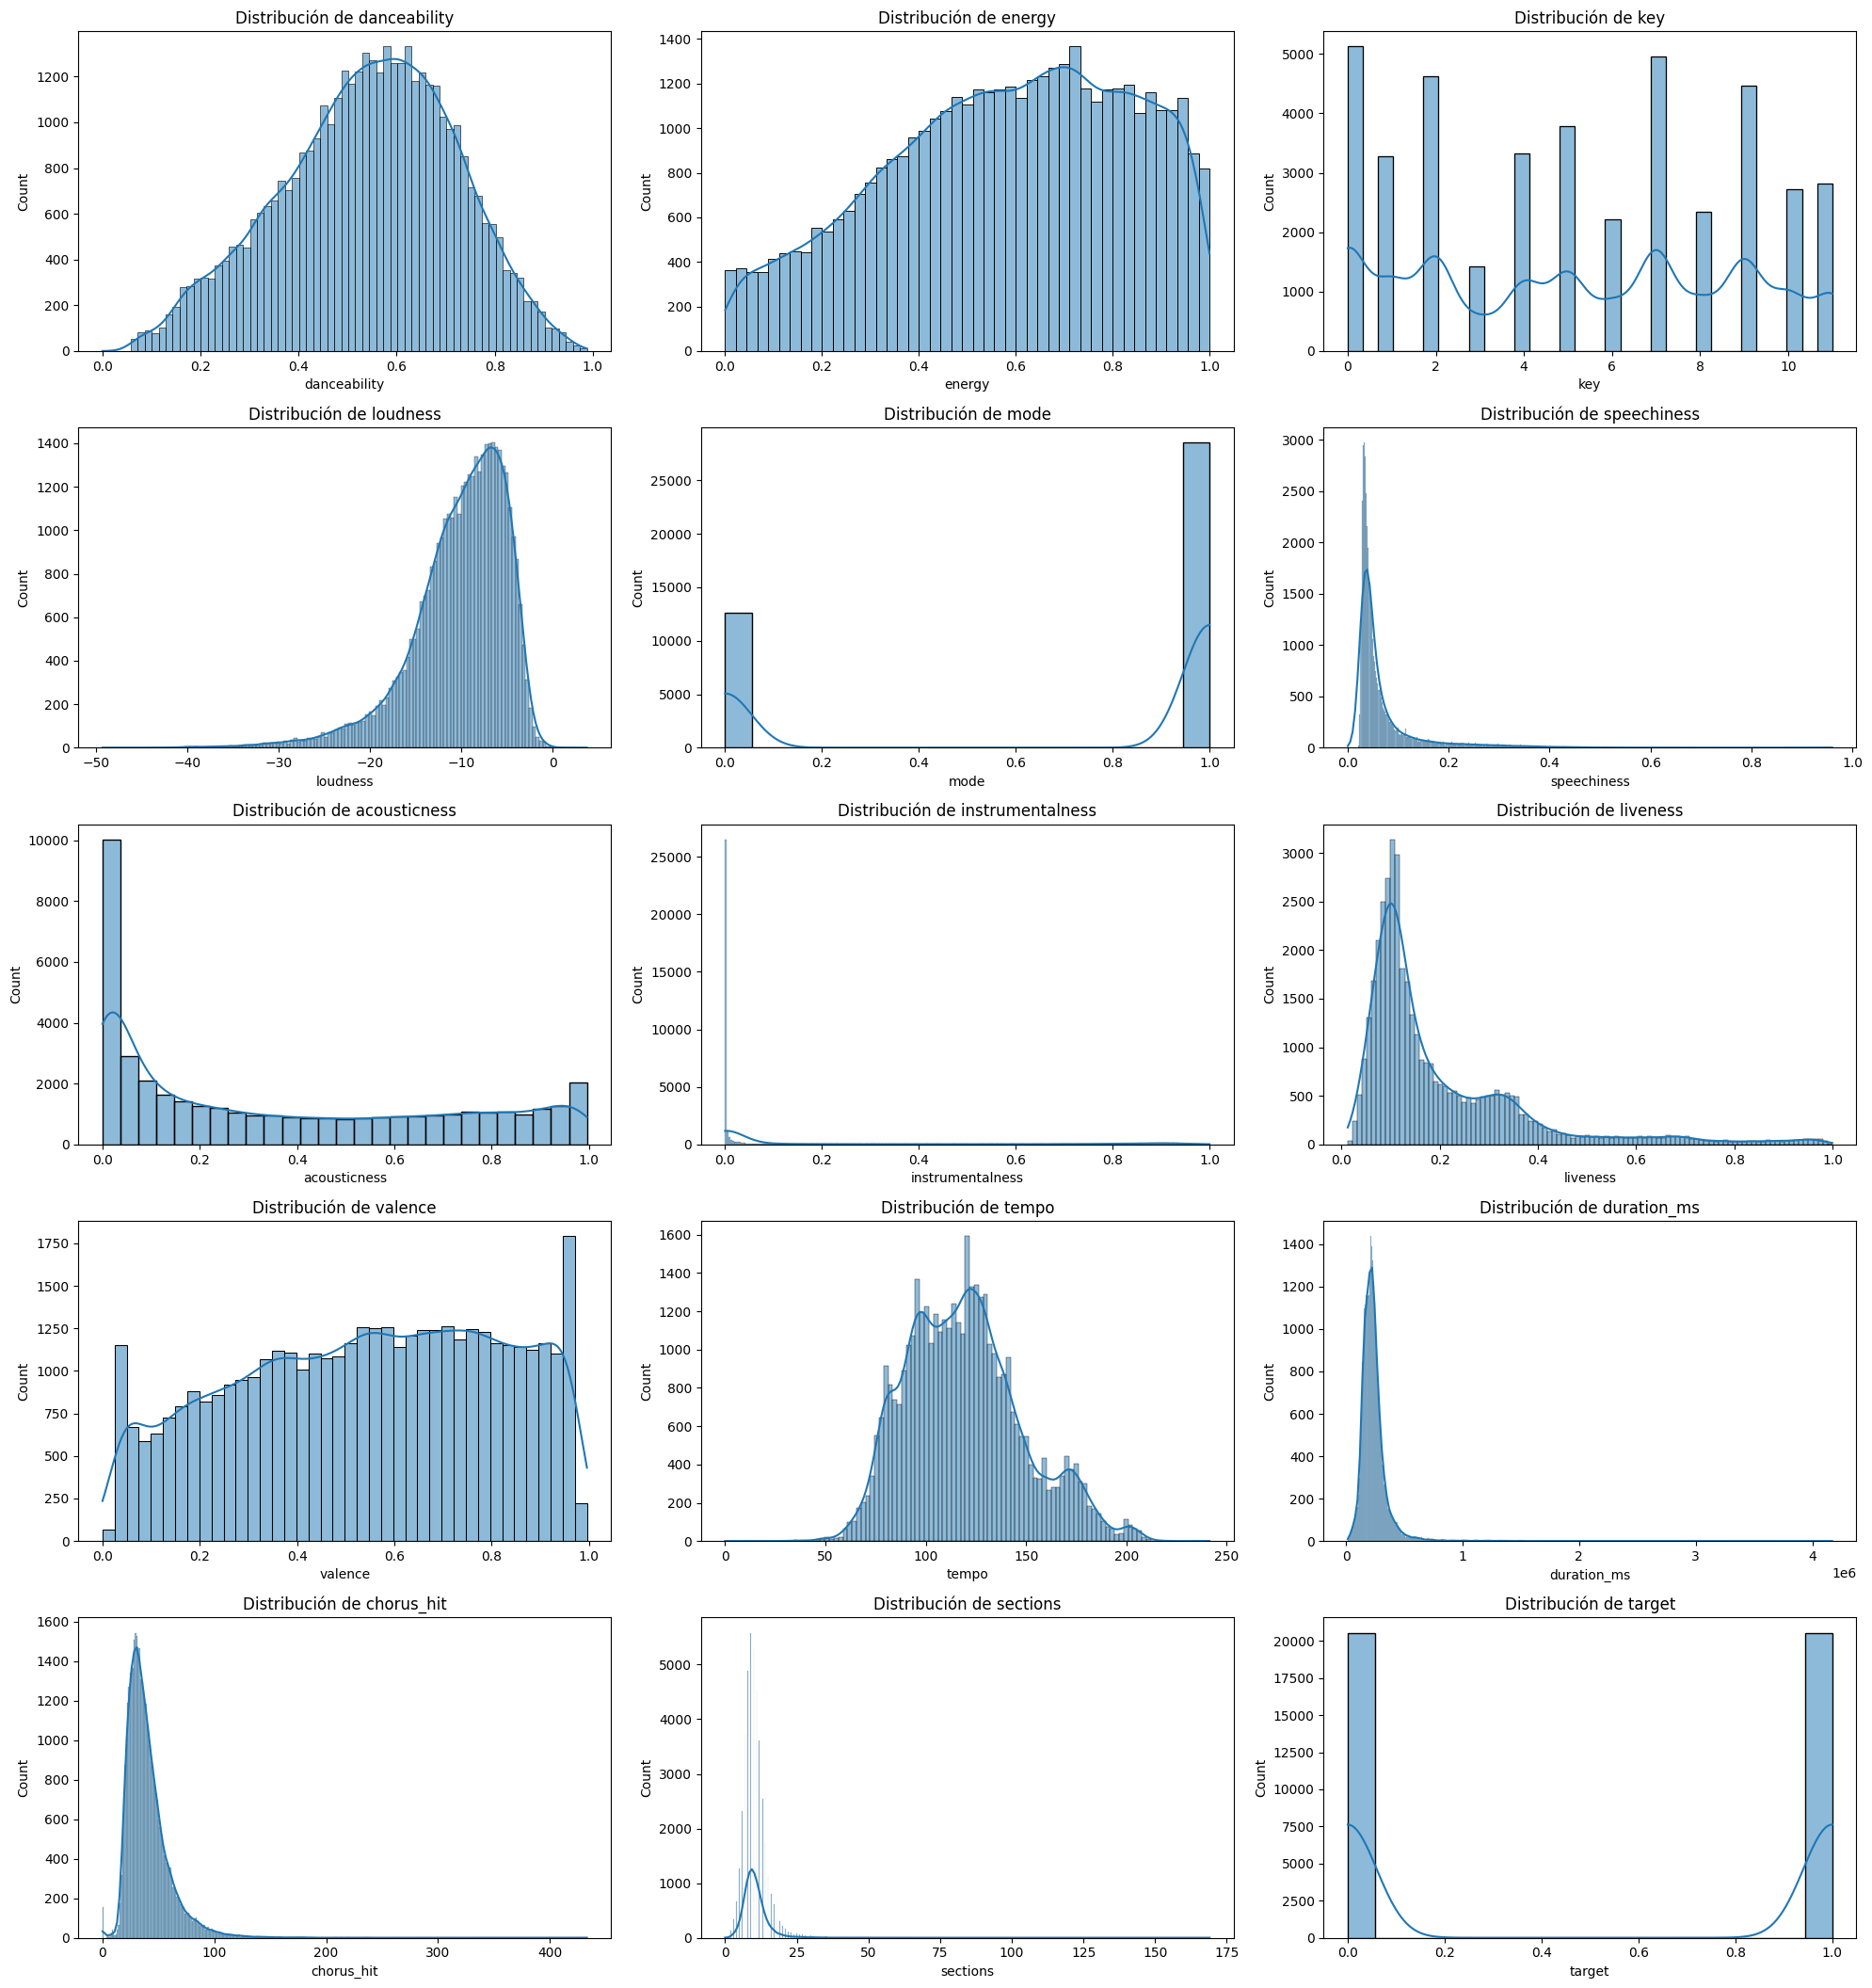

In [ ]:
numeric_features = spotify_df.select_dtypes(include=['float64', 'int64']).drop(columns=['time_signature'])

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(6, 3, i + 1)
    sns.histplot(spotify_df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

## Distribución de variables categóricas

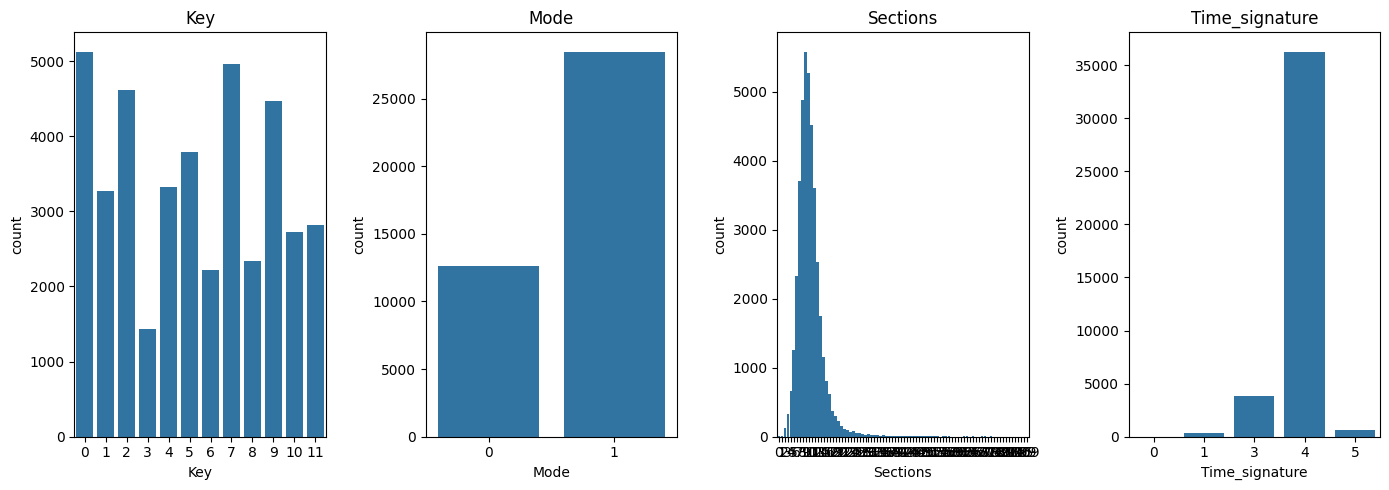

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(14, 5))
axes = axes.flatten()

features = ['key', 'mode', 'sections', 'time_signature']

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=spotify_df, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()

## Análisis de Valores Nulos

In [12]:
spotify_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

## Detección de Outliers

En base a los gráficos vistos anteriormente se analizarán algunas features en profundidad que son candidatas a tener outliers. Por el momento solo se identificarán, más adelante se decidirá que tratamiento se les da

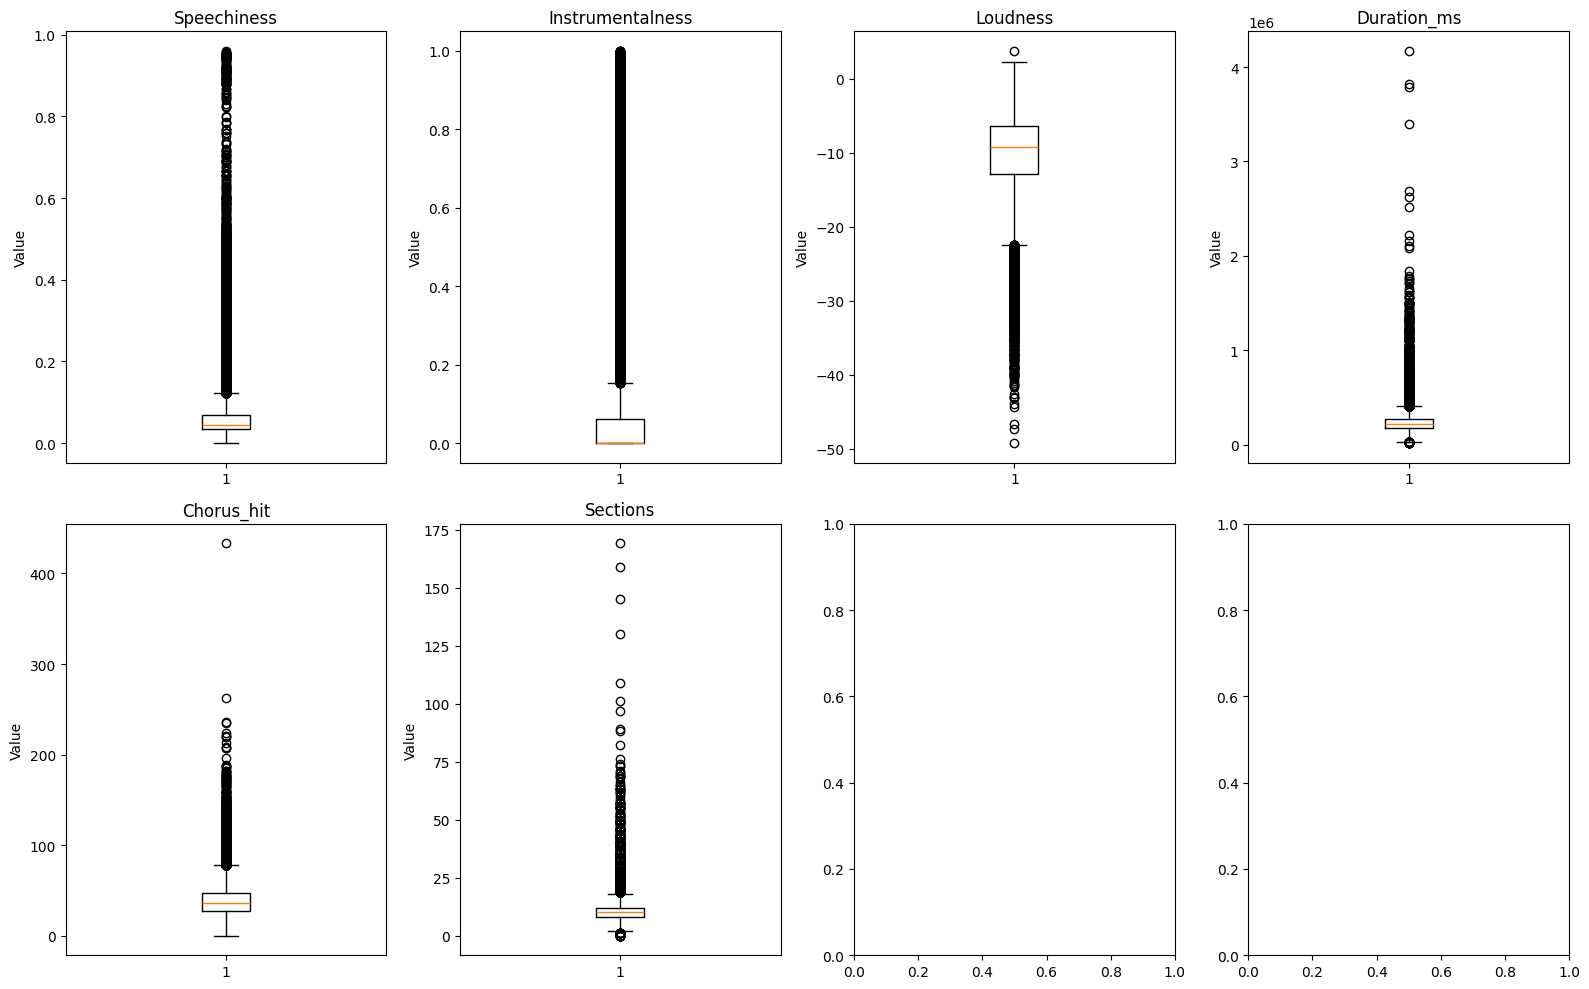

In [14]:
features_to_plot = ['speechiness', 'instrumentalness', 'loudness', 'duration_ms', 'chorus_hit', 'sections']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    axes[i].boxplot(spotify_df[feature], showfliers=True)
    axes[i].set_title(f'{feature.capitalize()}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
outliers = {}
for col in numeric_features.columns:
    Q1 = spotify_df[col].quantile(0.25)
    Q3 = spotify_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = spotify_df[(spotify_df[col] < (Q1 - 1.5 * IQR)) | (spotify_df[col] > (Q3 + 1.5 * IQR))].shape[0]
    outliers[col] = outlier_count

outliers

{'danceability': 1,
 'energy': 0,
 'key': 0,
 'loudness': 1343,
 'mode': 0,
 'speechiness': 5088,
 'acousticness': 0,
 'instrumentalness': 8920,
 'liveness': 2688,
 'valence': 0,
 'tempo': 434,
 'duration_ms': 1987,
 'chorus_hit': 1839,
 'sections': 1570,
 'target': 0}

## Relación de Variables con el Target

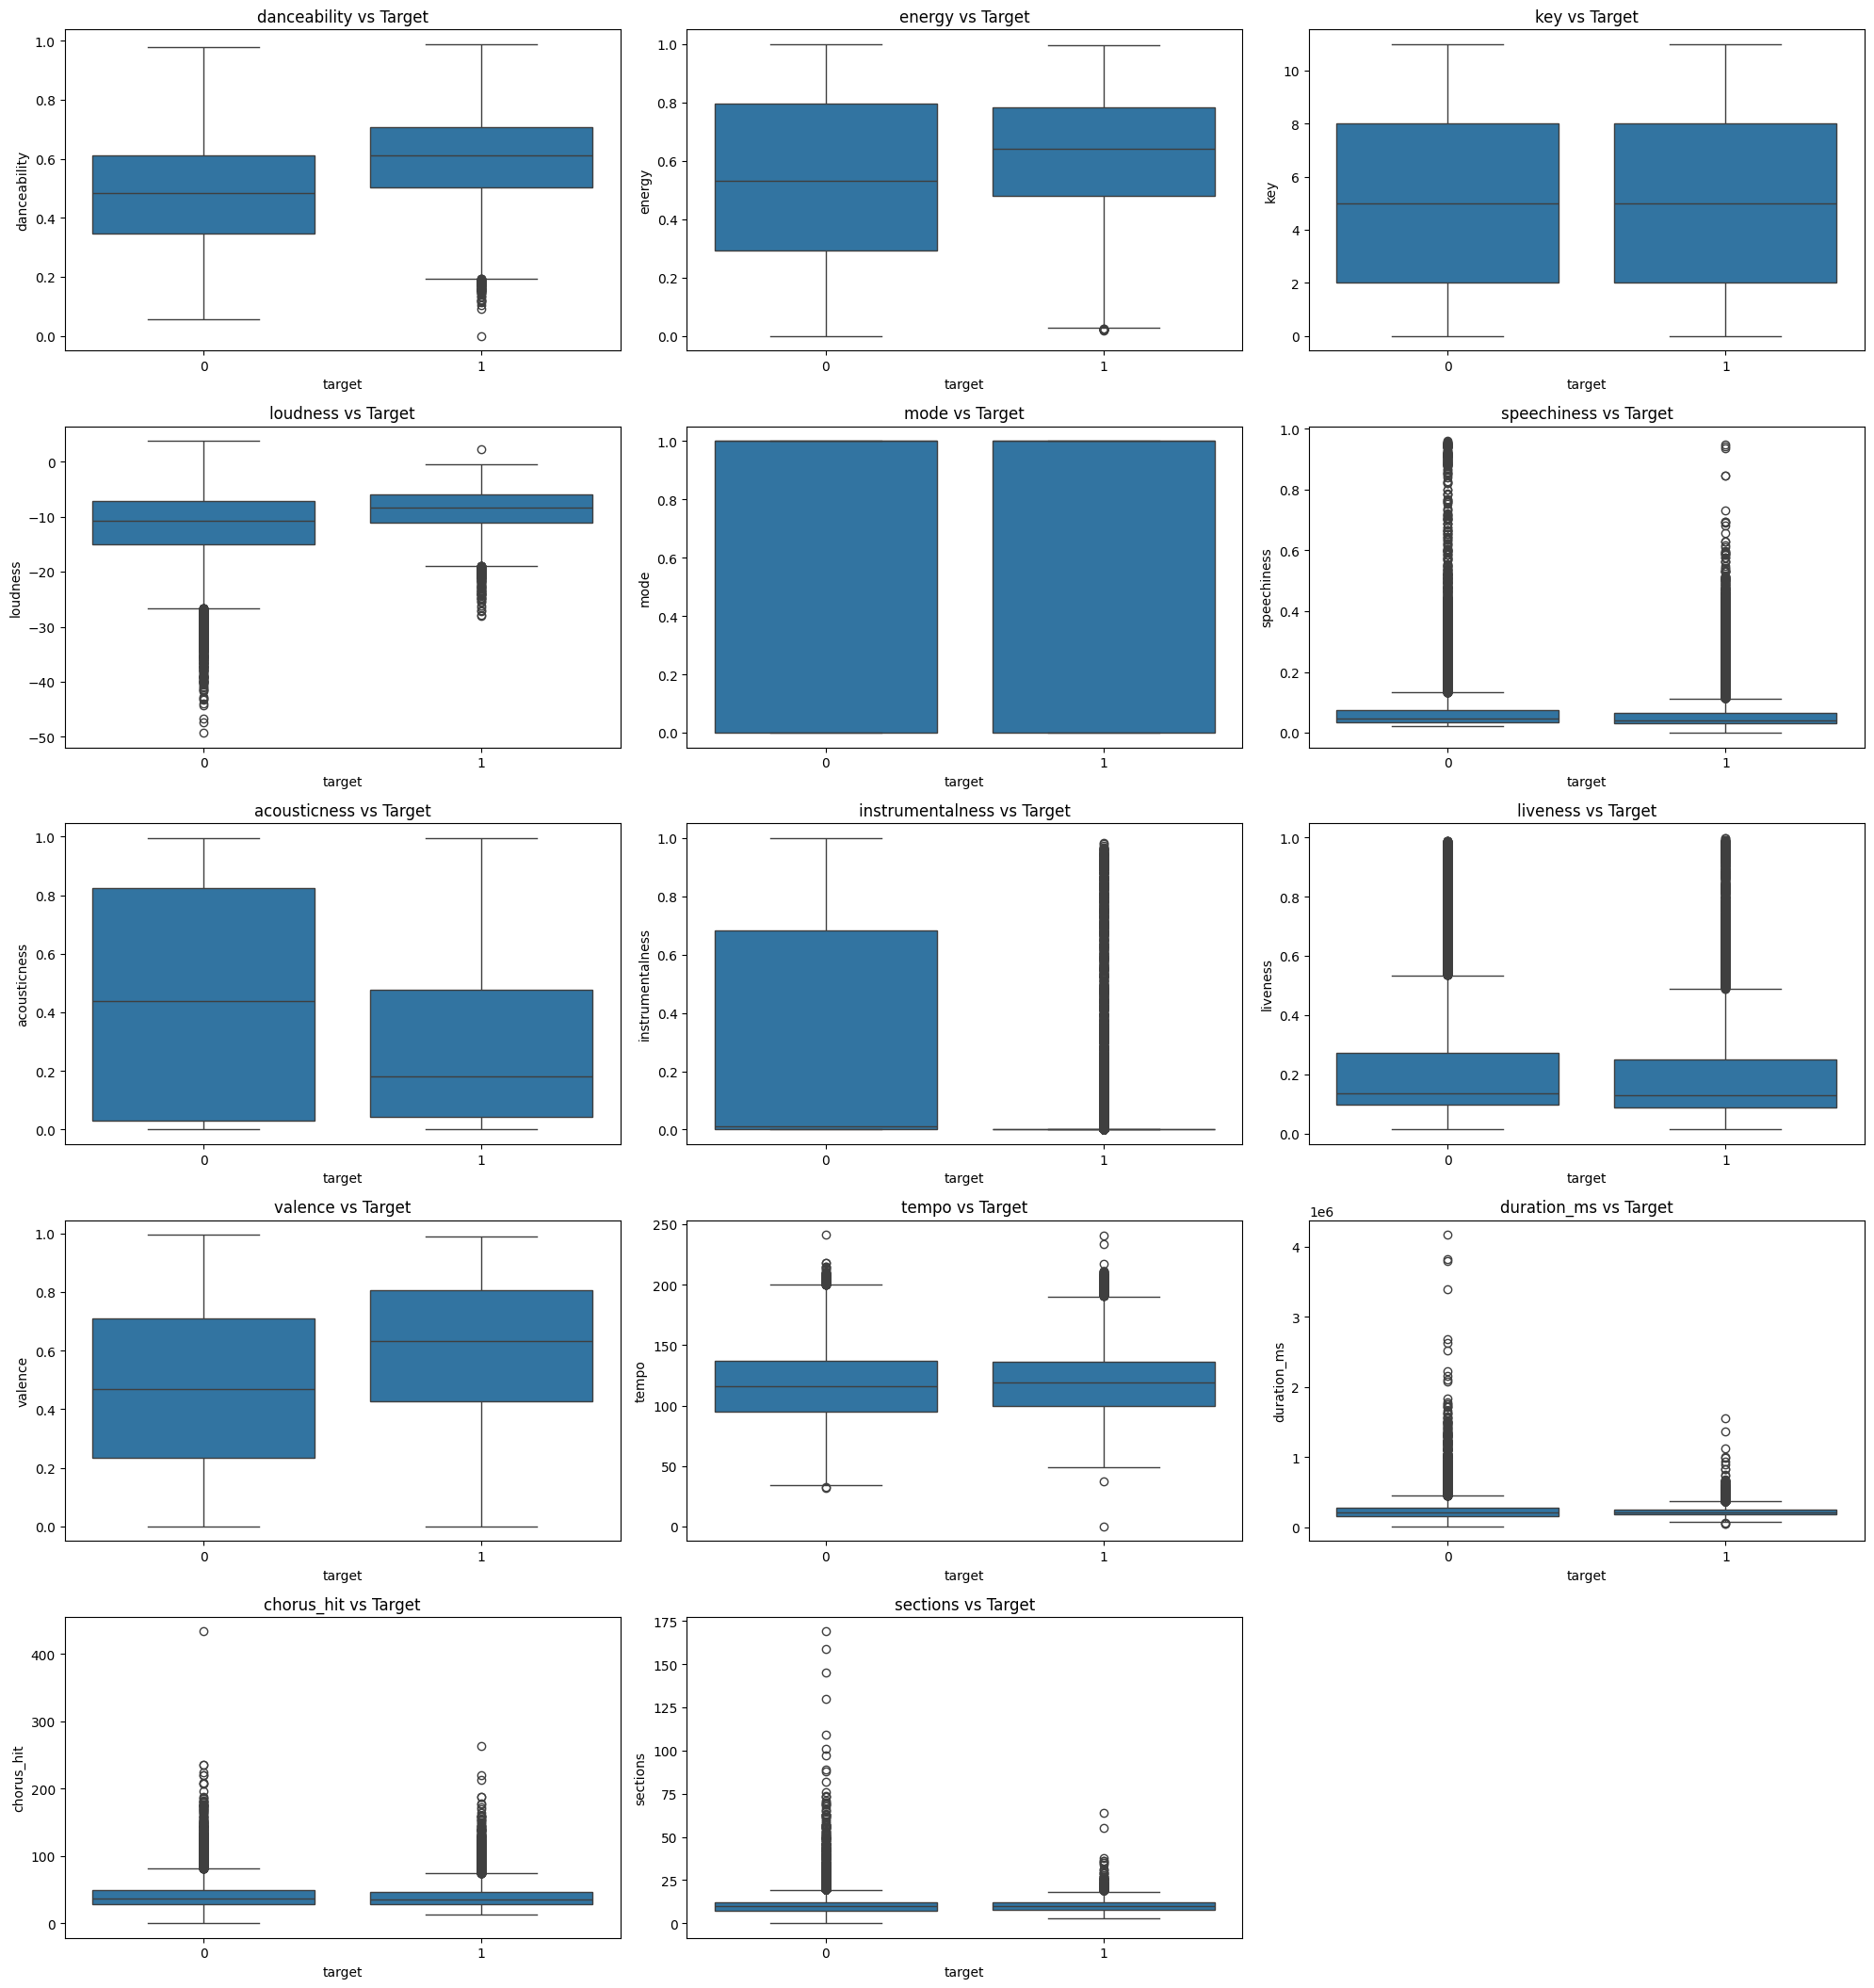

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_features.columns.drop('target')):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x='target', y=col, data=spotify_df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

## Matriz de Correlación

Ahora vamos a graficar una matriz de correlación para intentar definir las features más importantes y reducir la complejidad del problema

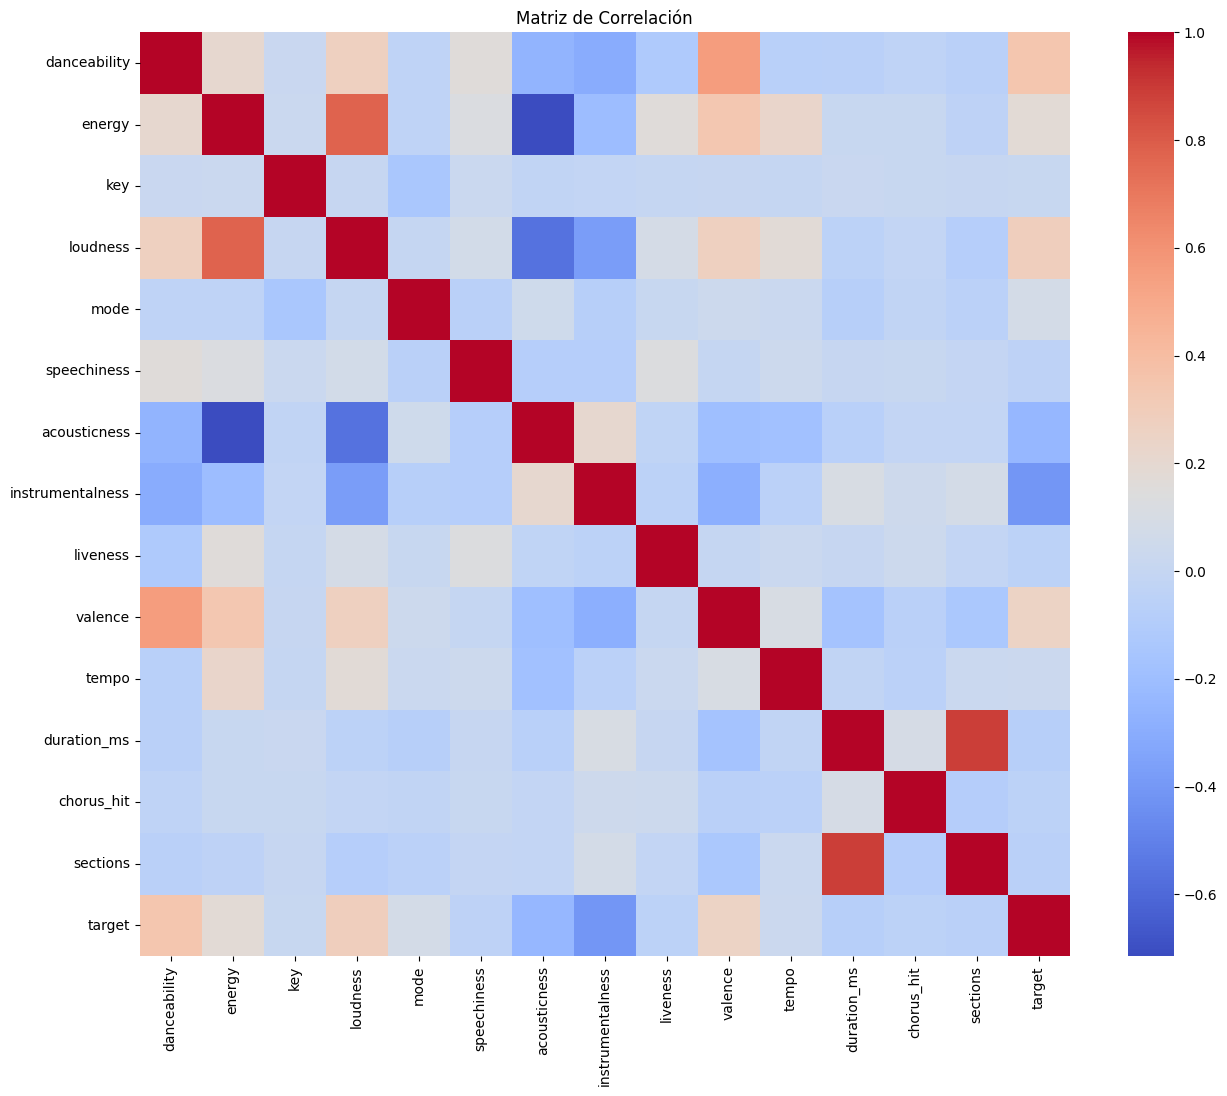

In [16]:
plt.figure(figsize=(15, 12))
correlation = numeric_features.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


## Conclusiones del EDA

- No se encontraron valores nulos en el dataset.
- Varias variables presentan outliers, principalmente `instrumentalness`, `speechiness` y `liveness`.
- Las canciones populares tienden a tener mayor `danceability`, `energy` y `valence`.
- Variables como `acousticness` e `instrumentalness` son más bajas en canciones populares.
- La matriz de correlación muestra relaciones esperadas, como `energy` con `loudness`.

Este análisis permitirá preparar los datos para entrenar modelos de Machine Learning en la siguiente etapa.
